# **Código**

## Bibliotecas

In [160]:
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

## Conjunto de Dados

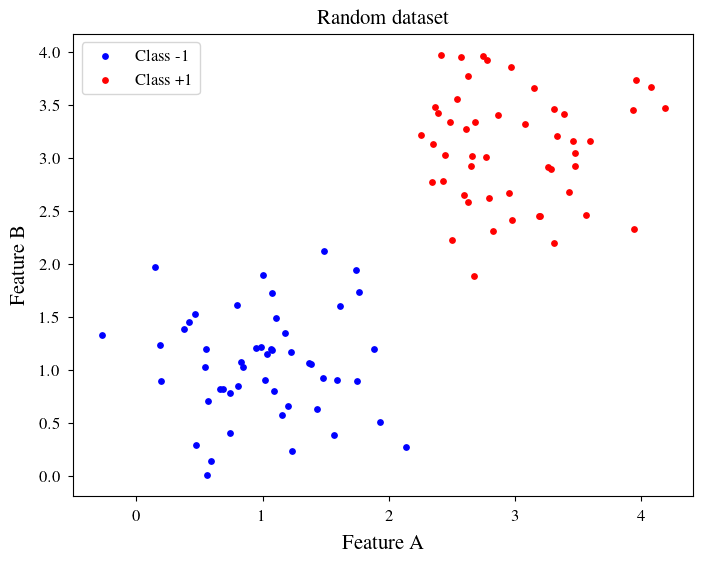

In [166]:
np.random.seed(0) # for reproducibility
numSamples = 50 # per class
noise = 0.5 # data noise
mean0 = np.array([1, 1]) # gaussian mean for class -1
mean1 = np.array([3, 3]) # gaussian mean for class +1

# Random data generator
X0 = np.random.randn(numSamples, 2)*noise + mean0
X1 = np.random.randn(numSamples, 2)*noise + mean1
X = np.vstack((X0, X1))
Y = np.hstack((-np.ones(numSamples), np.ones(numSamples)))

## Plot

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"]
})
px = 1/plt.rcParams['figure.dpi']

fig, ax = plt.subplots(1, figsize=(800*px, 600*px))

# Data points
ax.scatter(X[Y == -1, 0], X[Y == -1, 1], color="blue", label="Class -1", s=15)
ax.scatter(X[Y == 1, 0], X[Y == 1, 1], color="red", label="Class +1", s=15)

# Graphic configuration
ax.set_xlabel("Feature A", labelpad=7.5, fontsize=15)
ax.set_ylabel("Feature B", labelpad=7.5, fontsize=15)
ax.tick_params(pad=6, labelsize=12)
ax.set_title("Random dataset", pad=7.5, fontsize=15)
ax.legend(loc="best", frameon=True, fontsize=12)
plt.show()

fig.savefig("figures/random_database.png")


## Separação do conjunto de dados em treinamento e teste

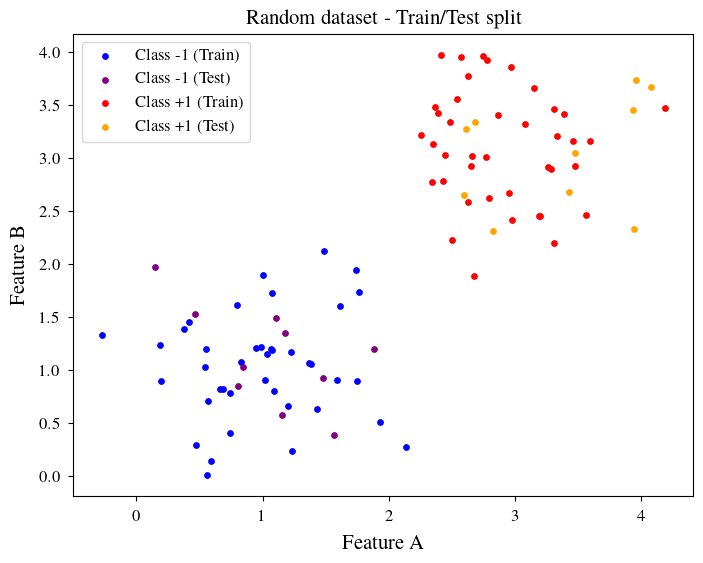

In [167]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y) # train/test split

## Plot

fig, ax = plt.subplots(1, figsize=(800*px, 600*px))

# Data points
ax.scatter(trainX[trainY == -1, 0], trainX[trainY == -1, 1], color="blue", label="Class -1 (Train)", s=15)
ax.scatter(testX[testY == -1, 0], testX[testY == -1, 1], color="purple", label="Class -1 (Test)", s=15)
ax.scatter(trainX[trainY == 1, 0], trainX[trainY == 1, 1], color="red", label="Class +1 (Train)", s=15)
ax.scatter(testX[testY == 1, 0], testX[testY == 1, 1], color="orange", label="Class +1 (Test)", s=15)

# Graphic configuration
ax.set_xlabel("Feature A", labelpad=7.5, fontsize=15)
ax.set_ylabel("Feature B", labelpad=7.5, fontsize=15)
ax.tick_params(pad=6, labelsize=12)
ax.set_title("Random dataset - Train/Test split", pad=7.5, fontsize=15)
ax.legend(loc="best", frameon=True, fontsize=12)
plt.show()

fig.savefig("figures/database_split.png")

## Perceptron

### Custom Perceptron

In [163]:
class CustomPerceptron:
    def __init__(self, max_epochs=1000, learning_rate=1):
        self.max_epochs = max_epochs # maximum number of epochs
        self.learning_rate = learning_rate # learning rate
        self.weights = None # weights vector (including bias)
        self.errors = [] # error history

    def fit(self, X, Y):
        # Adds a column of 1's for the bias
        augX = np.c_[np.ones(X.shape[0]), X] # augX = [1, x1, x2]
        numFeatures = augX.shape[1]
        
        # 1. Initialization of the weights vector
        self.weights = np.zeros(numFeatures)  # w(0) = [b, w1, w2] = [0, 0, 0]

        for epoch in range(self.max_epochs):
            epochError = 0
            for i in range(augX.shape[0]):
                # 2. Activation
                x = augX[i]
                d = Y[i] # desired response 

                # 3. Computation of actual response
                yPred = np.sign(np.dot(self.weights, x)) # sgn(w^T·x)

                # 4. Adaptation of Weight Vector
                if yPred != d:
                    self.weights += self.learning_rate*(d-yPred)*x
                    epochError += 1

            self.errors.append(epochError)
            if epochError == 0:  # Critério de parada (convergência)
                print(f"Convergence at the epoch {epoch + 1}.")
                break

    def predict(self, X):
        # Adds a column of 1's for the bias
        augX = np.c_[np.ones(X.shape[0]), X] # augX = [1, x1, x2]

        return np.sign(np.dot(augX, self.weights)) # sgn(w^T·x)

### Treinamento do Perceptron

Convergence at the epoch 3.


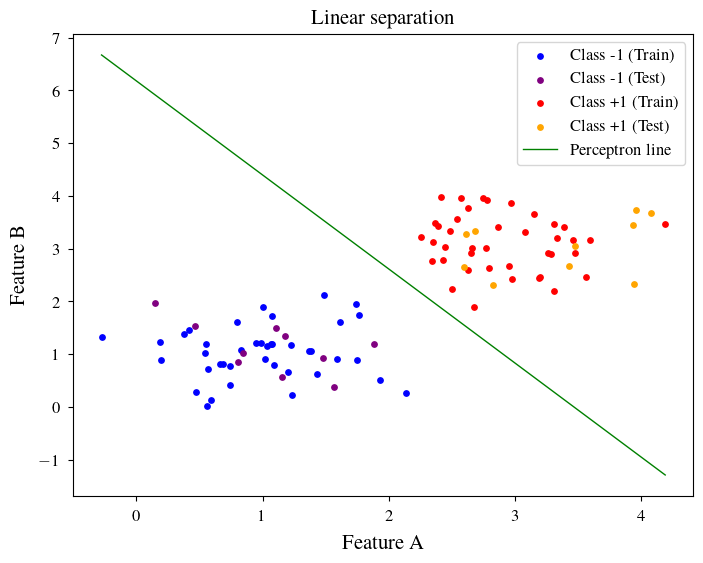

In [168]:
epochs = 10 # number of epochs
lr = 1 # "learning rate" (default)

# Training
model = CustomPerceptron(max_epochs=epochs, learning_rate=lr)
model.fit(trainX, trainY)

# Percepton line: w1*x1 + w2*x2 + bias = 0
b, w1, w2 = model.weights
x1Min, x1Max = X[:, 0].min(), X[:, 0].max()
x1Values = np.linspace(x1Min, x1Max, 100)
x2Values = (-w1*x1Values - b)/w2 # solve Perceptron line for x2: x2 = (-w1*x1 -b)/w2

## Plot

fig, ax = plt.subplots(1, figsize=(800*px, 600*px))

# Data points
ax.scatter(trainX[trainY == -1, 0], trainX[trainY == -1, 1], color="blue", label="Class -1 (Train)", s=15)
ax.scatter(testX[testY == -1, 0], testX[testY == -1, 1], color="purple", label="Class -1 (Test)", s=15)
ax.scatter(trainX[trainY == 1, 0], trainX[trainY == 1, 1], color="red", label="Class +1 (Train)", s=15)
ax.scatter(testX[testY == 1, 0], testX[testY == 1, 1], color="orange", label="Class +1 (Test)", s=15)
plt.plot(x1Values, x2Values, "g-", label="Perceptron line", linewidth=1)

# Graphic configuration
ax.set_xlabel("Feature A", labelpad=7.5, fontsize=15)
ax.set_ylabel("Feature B", labelpad=7.5, fontsize=15)
ax.tick_params(pad=6, labelsize=12)
ax.set_title("Linear separation", pad=7.5, fontsize=15)
ax.legend(loc="best", frameon=True, fontsize=12)
plt.show()

fig.savefig("figures/perceptron_line.png")

### Avaliação

In [165]:
acc = 100*np.mean(model.predict(testX) == testY)
print(f"Accuracy: {acc:.2f}%")

Accuracy: 100.00%
